In [1]:
# Importando todas las librerias del proyecto

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')



In [2]:
# Creamos un DataFrame de un archivo csv
global_temp_country = pd.read_csv('GlobalLandTemperaturesByCountry.csv')

#Mostramos los primeros 5 elementos del DataFrame para ver que contiene el archivo
global_temp_country.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [3]:
# Aplicamos describe() para ver a detalle todo en el DataFrame
global_temp_country.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,544811.000000,545550.000000
mean,17.193354,1.019057
std,10.953966,1.201930
min,-37.658000,0.052000
25%,10.025000,0.323000
50%,20.901000,0.571000
75%,25.814000,1.206000
max,38.842000,15.003000


In [4]:
# Aplicamos info() para verificar el tipo de variables y si tenemos valores faltantes
global_temp_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


### ***Limpieza de datos***

Realizaremos un proceso de limpieza teniendo en cuenta las situaciones mas comunes:

    1. Datos faltantes en algunas celdas
    2. Registros (filas) repetidos
    3. Valores extremos (outliers) en el caso de las variables numericas.
    4. Errores tipograficos


1. Datos faltantes en algunas celdas

In [5]:
# Eliminamos todos los registros con datos nulos ya que contamos con informacion suficiente
global_temp_country.dropna(inplace=True)
# Cambiamos el nombre de la columna dt por Date
global_temp_country= global_temp_country.rename(columns={'dt': 'Date'})
# Verificamos que tenemos la misma cantidad de datos no-null en todas las columnas
global_temp_country.info()

<class 'pandas.core.frame.DataFrame'>
Index: 544811 entries, 0 to 577460
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Date                           544811 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  544811 non-null  float64
 3   Country                        544811 non-null  object 
dtypes: float64(2), object(2)
memory usage: 20.8+ MB


2. Registros (filas) repetidos

In [6]:
    # Eliminamos todos los registros repetidos
    global_temp_country.drop_duplicates(inplace=True)
    # Verificamos que tenemos la misma cantidad de datos no-null en todas las columnas
    global_temp_country.info()

<class 'pandas.core.frame.DataFrame'>
Index: 544811 entries, 0 to 577460
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Date                           544811 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  544811 non-null  float64
 3   Country                        544811 non-null  object 
dtypes: float64(2), object(2)
memory usage: 20.8+ MB


3. Valores extremos (outliers) en el caso de las variables numericas.

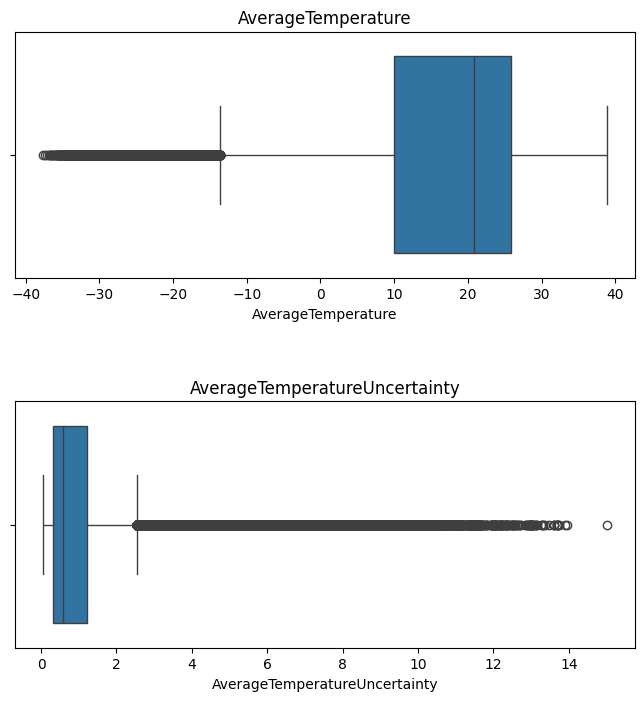

In [7]:
cols_num = ['AverageTemperature', 'AverageTemperatureUncertainty']

fig, ax = plt.subplots(nrows=2, ncols=1,figsize = (8,8))
fig.subplots_adjust(hspace=0.5)

for i,col in enumerate(cols_num):
    sns.boxplot(x=col, data=global_temp_country, ax=ax[i])
    ax[i].set_title(col)

**Observacion:** Comprobamos que no tenemos Outliers 

4. Errores tipograficos

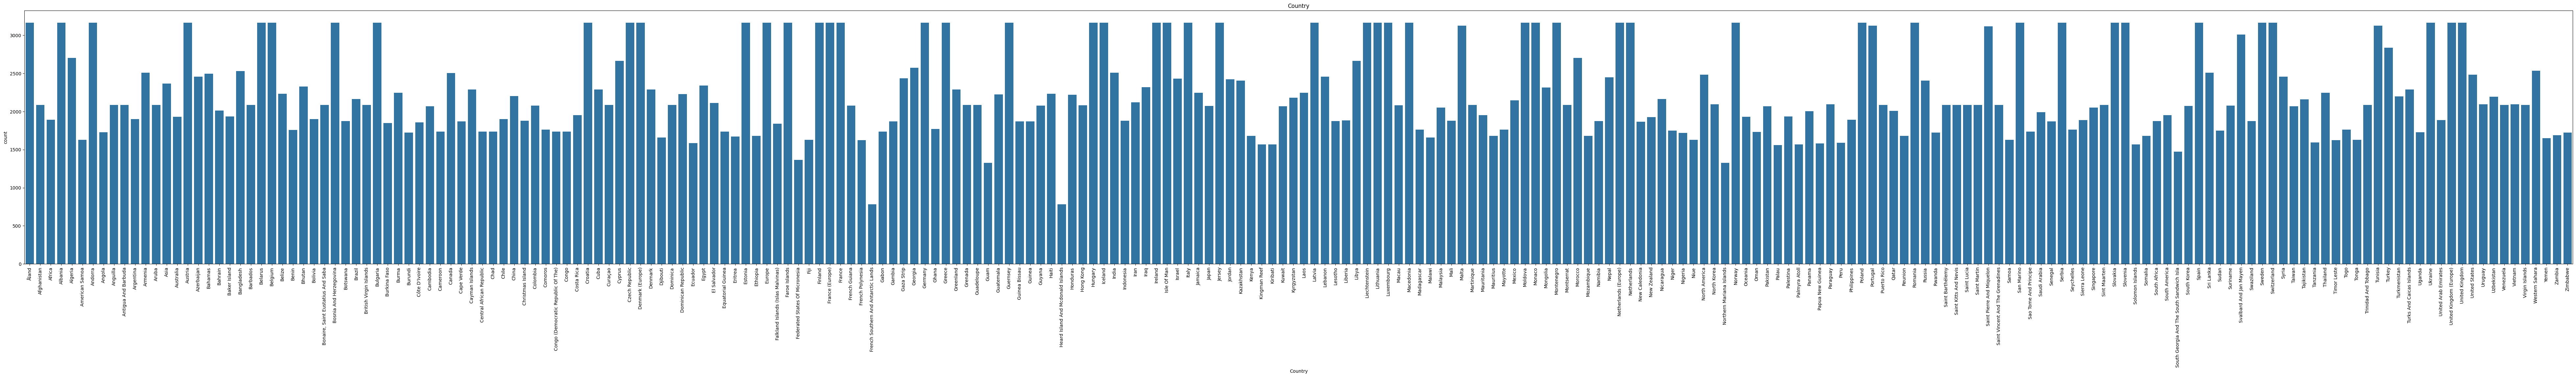

In [8]:
cols_num = ['Country']

fig, ax = plt.subplots(nrows=1, ncols=1,figsize = (100,10))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_num):
    sns.countplot(x=col, data=global_temp_country, ax=ax)
    ax.set_title(col)
    ax.set_xticklabels(ax.get_xticklabels(), rotation= 90)

In [9]:
# Eliminamos dublicados de paises y Continentes, con la funcion isin () invertida
global_temp_country = global_temp_country[~global_temp_country['Country'].isin(
    ['Denmark', 'Antarctica', 'France', 'Europe', 'Netherlands',
     'United Kingdom', 'Africa', 'South America'])]

# Cambiamos el nombre de los siguientes registros que tienen añadido (Europe) con la funcion remplace()
global_temp_country = global_temp_country.replace(
   ['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)'],
   ['Denmark', 'France', 'Netherlands', 'United Kingdom'])

In [10]:

# Ahora realizamos un promedio de la temperatura de cada pais

# Creamos una lista que contena todos los paises del DataFrame
countries = np.unique(global_temp_country['Country'])
mean_temp = []
# Este bucle calcula la temperatura promedio para cada país en la lista countries y almacena estos valores en una lista llamada mean_temp.
for country in countries:
    mean_temp.append(global_temp_country[global_temp_country['Country'] == country]['AverageTemperature'].mean())


# Creando un choropleth map
data = [ dict(
        type = 'choropleth',
        locations = countries,
        z = mean_temp,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = 'Temperatura\nPromedio,\n°C')
            )
       ]

layout = dict(
    title = 'Temperatura promedio en todos los paises',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')

In [11]:
continent = ['Russia', 'United States', 'Dominican Republic', 'Canada', 'Bolivia', 'China']
years = np.unique(global_temp_country['Date'].apply(lambda x: x[:4]))
years = list(map(int,years))

# Eliminar todos los datos menores a 1850
years = [x for x in years if x >= 1850]
years = list(map(str, years))


mean_temp_year_country = [ [0] * len(years) for i in range(len(continent))]

j = 0
for country in continent:
    all_temp_country = global_temp_country[global_temp_country['Country'] == country]
    i = 0
    for year in years:
        mean_temp_year_country[j][i] = all_temp_country[all_temp_country['Date'].apply(
                lambda x: x[:4]) == year]['AverageTemperature'].mean()
        i +=1
    j += 1

traces = []
colors = ['rgb(0, 255, 255)', 'rgb(255, 0, 255)', 'rgb(0, 0, 0)',
          'rgb(255, 0, 0)', 'rgb(0, 255, 0)', 'rgb(0, 0, 255)']
for i in range(len(continent)):
    traces.append(go.Scatter(
        x=years,
        y=mean_temp_year_country[i],
        mode='lines',
        name=continent[i],
        line=dict(color=colors[i]),
    ))

layout = go.Layout(
    xaxis=dict(title='year'),
    yaxis=dict(title='Average Temperature, °C'),
    title='Average land temperature on the continents',)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig)